In [1]:
# Задание 1
# Импортируйте библиотеки pandas, numpy и matplotlib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
#Создайте датафреймы X и y из этих данных.
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split
# так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((404, 13), (102, 13), (404,), (102,))

In [5]:
# Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
# Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_sc)
print(f'SC: {X_train_sc.shape}')
print(f'TSNE: {X_train_tsne.shape}')

SC: (404, 13)
TSNE: (404, 2)


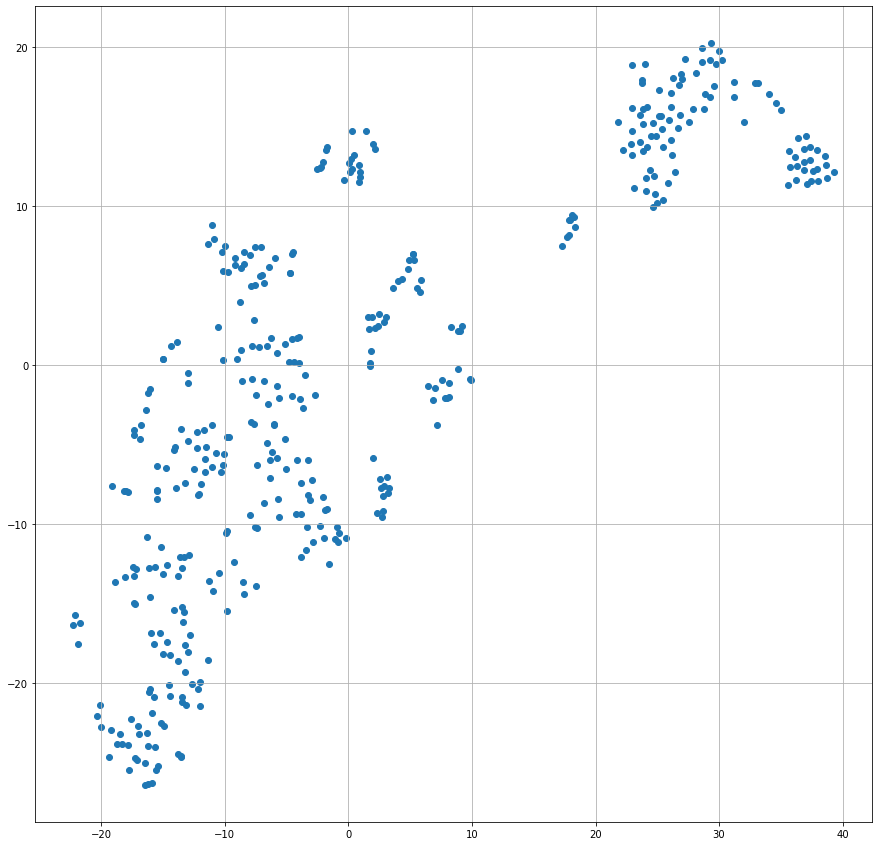

In [14]:
#Постройте диаграмму рассеяния на этих данных.
fig = plt.figure()
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.grid()
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

In [15]:
#Задание 2
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
#Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
ltrain = kmeans.fit_predict(X_train_sc)

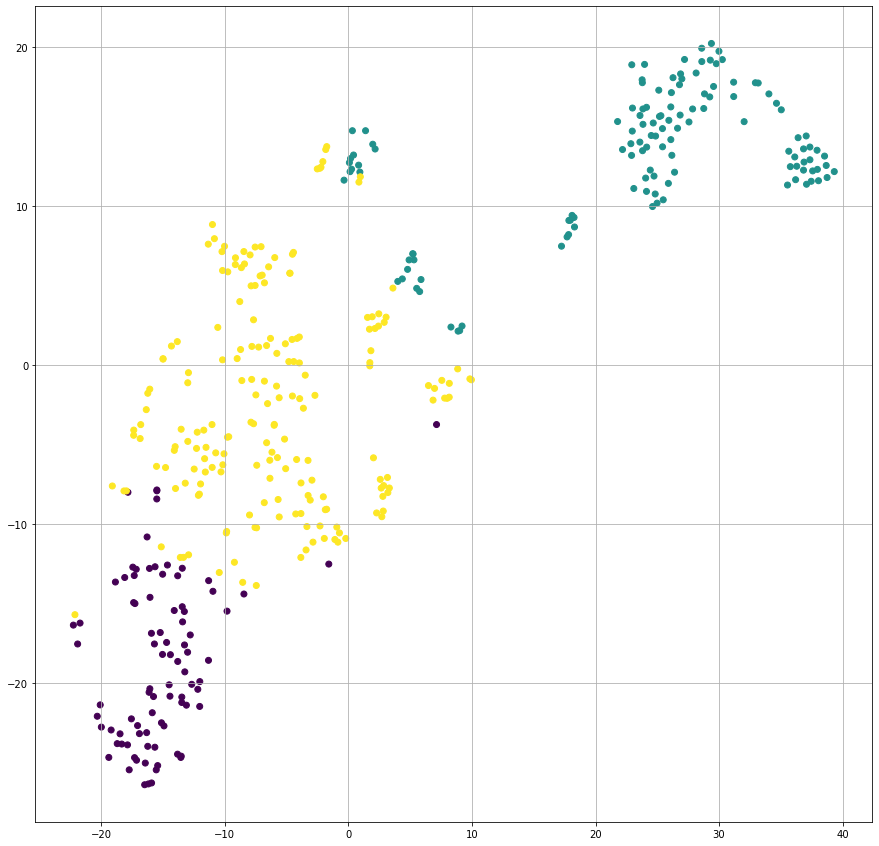

In [27]:
#Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров
# разными цветами.
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(15)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=ltrain)
plt.grid()
plt.show()

In [28]:
#Вычислите средние значения price и CRIM в разных кластерах.
print(f"PRICE Кластер 0: {format(y_train[ltrain == 0].mean())}")
print(f"PRICE Кластер 1: {format(y_train[ltrain == 1].mean())}")
print(f"PRICE Кластер 2: {format(y_train[ltrain == 2].mean())}")
print(f"CRIM Кластер 0: {format(X_train.loc[ltrain == 0, 'CRIM'].mean())}")
print(f"CRIM Кластер 1: {format(X_train.loc[ltrain == 1, 'CRIM'].mean())}")
print(f"CRIM Кластер 2: {format(X_train.loc[ltrain == 2, 'CRIM'].mean())}")


PRICE Кластер 0: 27.78837209302326
PRICE Кластер 1: 16.165354330708663
PRICE Кластер 2: 24.958115183246072
CRIM Кластер 0: 0.07356558139534886
CRIM Кластер 1: 10.797028425196853
CRIM Кластер 2: 0.42166020942408367


In [35]:
# Задание 3 
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
ltest = kmeans.predict(X_test_sc)
ltest


array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2])

In [41]:
#Вычислите средние значения price и CRIM в разных кластерах.
print(f"PRICE Кластер 0: {format(y_test[ltest == 0].mean())}")
print(f"PRICE Кластер 1: {format(y_test[ltest == 1].mean())}")
print(f"PRICE Кластер 2: {format(y_test[ltest == 2].mean())}")
print(f"CRIM Кластер 0: {format(X_test.loc[ltest == 0, 'CRIM'].mean())}")
print(f"CRIM Кластер 1: {format(X_test.loc[ltest == 1, 'CRIM'].mean())}")
print(f"CRIM Кластер 2: {format(X_test.loc[ltest == 2, 'CRIM'].mean())}")

PRICE Кластер 0: 31.35
PRICE Кластер 1: 16.43714285714286
PRICE Кластер 2: 21.860784313725492
CRIM Кластер 0: 0.062060000000000004
CRIM Кластер 1: 10.165531142857143
CRIM Кластер 2: 0.26607882352941176
